# Hitters

In [1]:
# Download the dataset
download.file("https://myslu.stlawu.edu/~ltorrey/ml/Hitters.csv", "Hitters.csv")
Hitters <- read.csv("Hitters.csv", stringsAsFactors = TRUE)

In [2]:
# Inspect the first few rows
head(Hitters)

,at.bats,hits,home.runs,runs,rbi,walks,years,career.at.bats,career.hits,career.home.runs,career.runs,career.rbi,career.walks,league,division,put.outs,assists,errors,new.league,salary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<dbl>
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,A,750.0
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,A,70.0


In [4]:
# Build a Full Linear Model
full.lm <- lm(salary ~ ., data = Hitters)
summary(full.lm)


Call:
lm(formula = salary ~ ., data = Hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-907.62 -178.35  -31.11  139.09 1877.04 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       163.10359   90.77854   1.797 0.073622 .  
at.bats            -1.97987    0.63398  -3.123 0.002008 ** 
hits                7.50077    2.37753   3.155 0.001808 ** 
home.runs           4.33088    6.20145   0.698 0.485616    
runs               -2.37621    2.98076  -0.797 0.426122    
rbi                -1.04496    2.60088  -0.402 0.688204    
walks               6.23129    1.82850   3.408 0.000766 ***
years              -3.48905   12.41219  -0.281 0.778874    
career.at.bats     -0.17134    0.13524  -1.267 0.206380    
career.hits         0.13399    0.67455   0.199 0.842713    
career.home.runs   -0.17286    1.61724  -0.107 0.914967    
career.runs         1.45430    0.75046   1.938 0.053795 .  
career.rbi          0.80771    0.69262   1.166 0.244691    
car

# Variable selection

In [6]:
install.packages("leaps")
library(leaps) # regsubsets

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



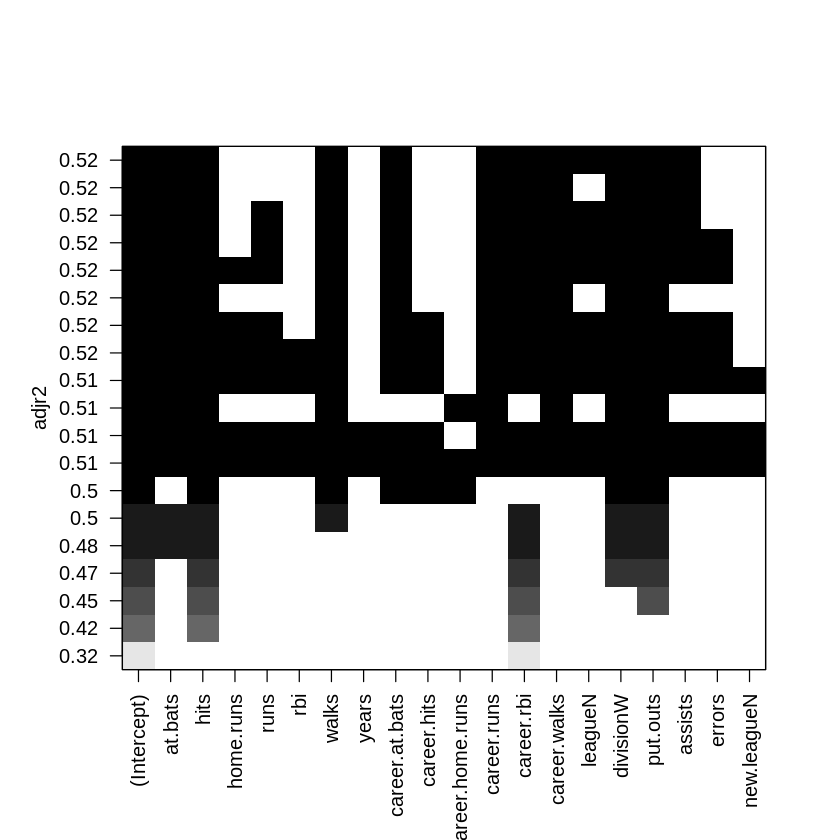

In [11]:
# Run best subset selection
subsets <- regsubsets(salary ~., data = Hitters, nvmax = length(Hitters)-1)
plot(subsets, scale = "adjr2") # Plot adj R^2

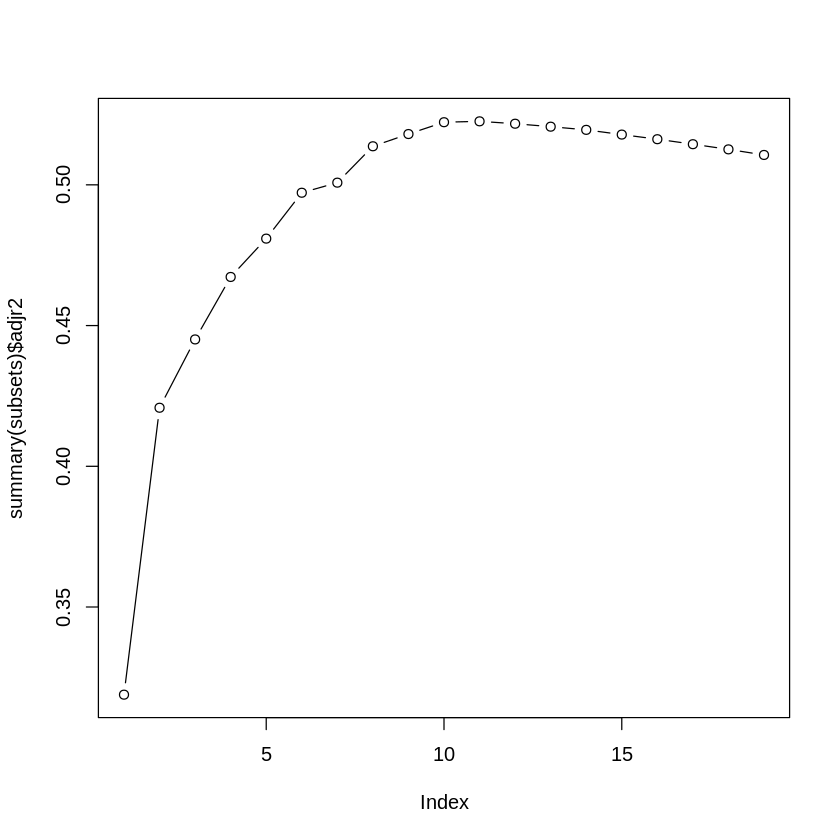

In [13]:
# Plot score for models
plot(summary(subsets)$adjr2, type = "b")

# Principal components regression

In [14]:
install.packages("pls")
library(pls) # pcr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




[1] 1

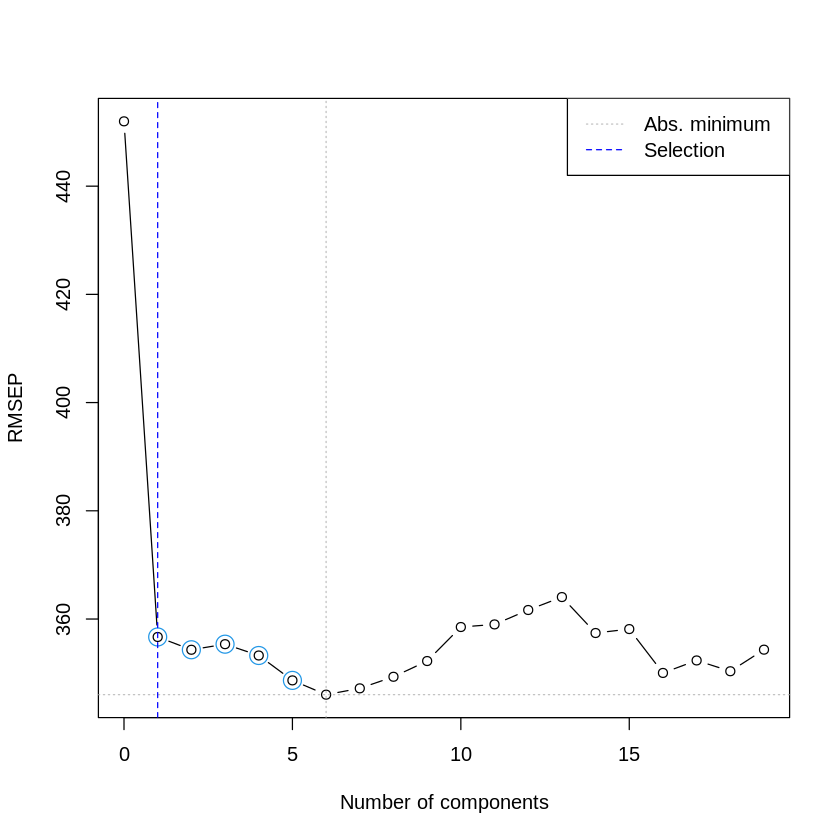

In [24]:
# Perform PCR and consider number of componenets
components <- pcr(salary ~ ., data = Hitters, scale = TRUE, validation = "CV")
selectNcomp(components, plot = TRUE)
# Root Mean Sqr Error P
# At 1 interpretation is - error is about 350,000 dollars off from actual.
# dotted blue and best selected and dotted white is lowest
# Selected model is first within one standard error of best model

# Comparisons

In [25]:
install.packages("splitTools")
library(splitTools) # create_folds

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [57]:
# create CV folds
folds <- create_folds(Hitters$salary, k =5)


In [58]:
# Estimate future error of full linear model
mse <- rep(0,5)
i <- 1

for (train in folds){
  model <- lm(salary ~ ., data = Hitters[train,])
  predictions <- predict(model, newdata = Hitters[-train,])
  mse[i] <- mean((predictions - Hitters[-train,]$salary) ** 2)
  i <- i + 1
}
sqrt(mean(mse))

[1] 345.0764

In [63]:
# Estimate future error of a 6 predictor model
mse <- rep(0,5)
i <- 1

for (train in folds){
  model <- lm(salary ~ at.bats + hits + walks + career.rbi + division + put.outs, data = Hitters[train,])
  predictions <- predict(model, newdata = Hitters[-train,])
  mse[i] <- mean((predictions - Hitters[-train,]$salary) ** 2)
  i <- i + 1
}
sqrt(mean(mse))

[1] 328.4919

In [64]:
# Estimate future error of a 1 component PCR
mse <- rep(0,5)
i <- 1

for (train in folds){
  model <- pcr(salary ~ ., scale = TRUE, data = Hitters[train,])
  predictions <- predict(model, newdata = Hitters[-train,], ncomp = 1)
  mse[i] <- mean((predictions - Hitters[-train,]$salary) ** 2)
  i <- i + 1
}
sqrt(mean(mse))

[1] 352.3696